<a href="https://colab.research.google.com/github/Deepika26991/DV_Assignment/blob/main/Task6_Dv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

# Optional: install pyvis if you want HTML view
# !pip install pyvis

USE_PYVIS = True   # Toggle interactive view

# 1) Load built-in Karate Club dataset
G = nx.karate_club_graph()
print("Graph loaded — nodes:", G.number_of_nodes(), "edges:", G.number_of_edges())

# 2) Compute degree and community
degree = dict(G.degree())
nx.set_node_attributes(G, degree, 'degree')

# Detect communities (Louvain or greedy)
try:
    import community as community_louvain
    partition = community_louvain.best_partition(G)
    nx.set_node_attributes(G, partition, 'community')
    print("Louvain communities detected.")
except Exception:
    communities = list(nx.algorithms.community.greedy_modularity_communities(G))
    partition = {}
    for i, comm in enumerate(communities):
        for n in comm:
            partition[n] = i
    nx.set_node_attributes(G, partition, 'community')
    print("Greedy modularity communities assigned (fallback).")

# 3) Force layout for node positions
pos = nx.spring_layout(G, k=0.3, iterations=200, seed=42)

# 4) Prepare Plotly traces
edge_x, edge_y = [], []
for u, v in G.edges():
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

node_x, node_y, node_text, node_size, node_color = [], [], [], [], []
for n_, data in G.nodes(data=True):
    x, y = pos[n_]
    node_x.append(x)
    node_y.append(y)
    deg = data.get('degree', 1)
    node_size.append(6 + (deg ** 0.8) * 2)
    node_color.append(data.get('community', 0))
    node_text.append(f"node: {n_}<br>degree: {deg}<br>community: {data.get('community',0)}")

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    text=node_text,
    marker=dict(
        showscale=True,
        colorscale='Turbo',
        color=node_color,
        size=node_size,
        colorbar=dict(title="Community"),
        line_width=0.5
    )
)

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Karate Club Social Network (Plotly)',
                    title_x=0.5,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
                ))
fig.update_layout(width=900, height=700)
fig.show()

# 5) Optional: PyVis visualization
if USE_PYVIS:
    try:
        from pyvis.network import Network
        net = Network(height='800px', width='100%', notebook=True, bgcolor='#ffffff', cdn_resources='in_line')
        net.barnes_hut()
        for node, data in G.nodes(data=True):
            net.add_node(node, label=str(node),
                         title=f"node: {node}<br>degree: {data.get('degree',0)}<br>community: {data.get('community',0)}",
                         value=data.get('degree',1))
        for u, v in G.edges():
            net.add_edge(u, v)
        out_html = '/content/karate_club_network.html'
        net.show(out_html)
        print("PyVis network saved to:", out_html)
    except Exception as e:
        print("PyVis skipped or failed. Install pyvis to enable this. Error:", e)

Graph loaded — nodes: 34 edges: 78
Greedy modularity communities assigned (fallback).


/content/karate_club_network.html
PyVis network saved to: /content/karate_club_network.html


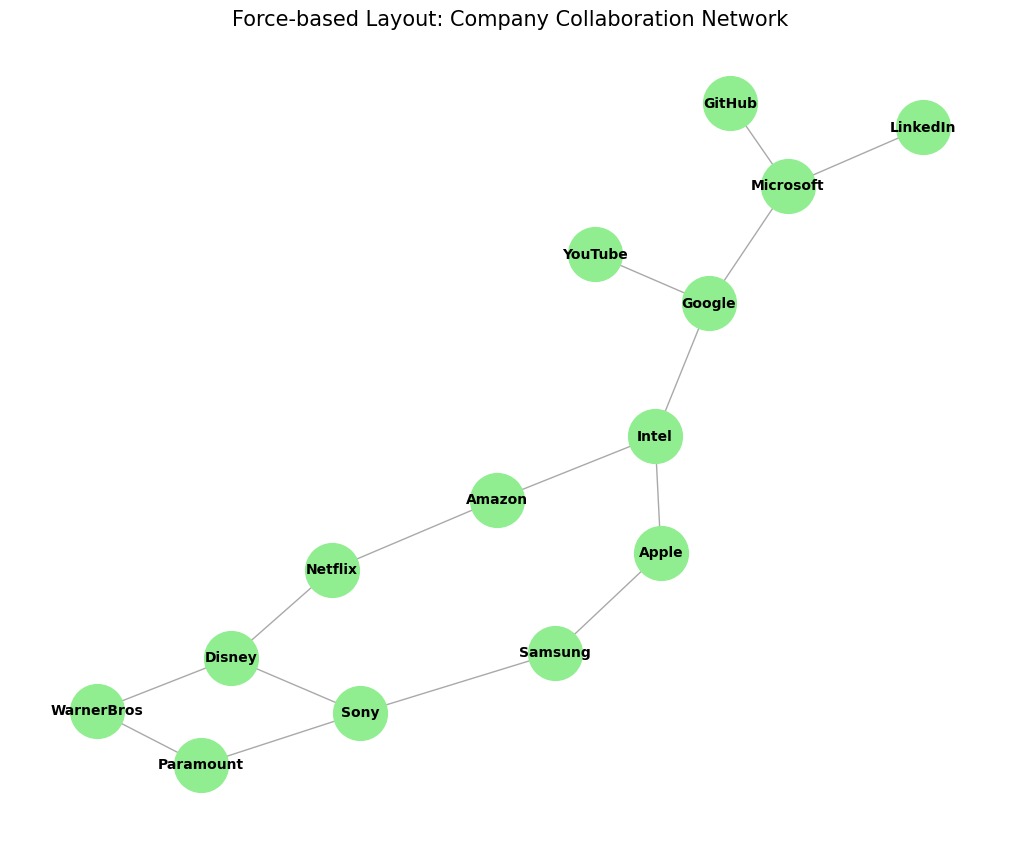

In [ ]:
# Force-based Layout Visualization using NetworkX
import networkx as nx
import matplotlib.pyplot as plt

# ---- Step 1: Create sample dataset (Company Collaborations) ----
edges = [
    ("Google", "Microsoft"),
    ("Google", "YouTube"),
    ("Google", "Intel"),
    ("Microsoft", "LinkedIn"),
    ("Microsoft", "GitHub"),
    ("Amazon", "Netflix"),
    ("Amazon", "Intel"),
    ("Netflix", "Disney"),
    ("Intel", "Apple"),
    ("Apple", "Samsung"),
    ("Samsung", "Sony"),
    ("Sony", "Disney"),
    ("Disney", "WarnerBros"),
    ("WarnerBros", "Paramount"),
    ("Paramount", "Sony")
]

# ---- Step 2: Create a Graph ----
G = nx.Graph()
G.add_edges_from(edges)

# ---- Step 3: Compute Force-based Layout ----
# spring_layout uses the Fruchterman-Reingold algorithm
pos = nx.spring_layout(G, seed=42)

# ---- Step 4: Visualize the Graph ----
plt.figure(figsize=(10,8))
nx.draw(G, pos, with_labels=True,
        node_color='lightgreen',
        node_size=1500,
        font_size=10,
        font_weight='bold',
        edge_color='darkgray')
plt.title("Force-based Layout: Company Collaboration Network", fontsize=15)
plt.show()


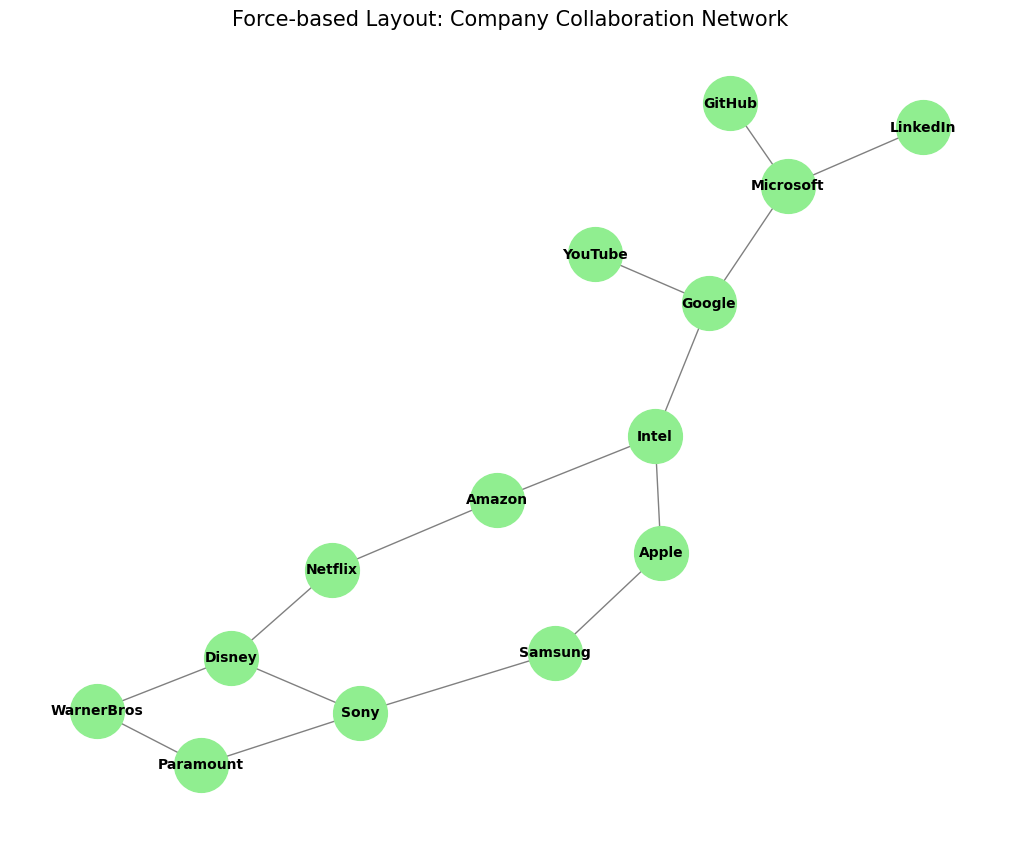

company_network.html
✅ Interactive network saved as 'company_network.html'. Open it in your browser to explore.


In [ ]:
# ------------------------------
# Force-based Layout Visualization (Static + Interactive)
# ------------------------------

import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

# ---- Step 1: Create Sample Dataset (Company Collaborations) ----
edges = [
    ("Google", "Microsoft"),
    ("Google", "YouTube"),
    ("Google", "Intel"),
    ("Microsoft", "LinkedIn"),
    ("Microsoft", "GitHub"),
    ("Amazon", "Netflix"),
    ("Amazon", "Intel"),
    ("Netflix", "Disney"),
    ("Intel", "Apple"),
    ("Apple", "Samsung"),
    ("Samsung", "Sony"),
    ("Sony", "Disney"),
    ("Disney", "WarnerBros"),
    ("WarnerBros", "Paramount"),
    ("Paramount", "Sony")
]

# ---- Step 2: Create Graph ----
G = nx.Graph()
G.add_edges_from(edges)

# ---- Step 3: Compute Force-based Layout ----
pos = nx.spring_layout(G, seed=42)

# ---- Step 4: Static Visualization ----
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True,
        node_color='lightgreen',
        node_size=1500,
        font_size=10,
        font_weight='bold',
        edge_color='gray')
plt.title("Force-based Layout: Company Collaboration Network", fontsize=15)
plt.show()

# ---- Step 5: Interactive Visualization using PyVis ----
net = Network(height='700px', width='100%', bgcolor='#ffffff', font_color='black', notebook=True, cdn_resources='in_line')

# Convert the NetworkX graph to PyVis format
net.from_nx(G)

# Add some layout options
net.toggle_physics(True)  # Enables force-based layout
net.force_atlas_2based()  # Improves layout stability

# Save and show the graph
net.show("company_network.html")

print("✅ Interactive network saved as 'company_network.html'. Open it in your browser to explore.")

In [ ]:
%pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.5 MB/s eta 0:00:00
